In [1]:
#import dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
#import dataset
dataset = pd.read_csv('air_qual.csv')

In [4]:
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
dataset.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [9]:
dataset.shape

(41757, 13)

In [10]:
dataset.drop(['No'],axis=1,inplace = True)

In [11]:
dataset.shape

(41757, 12)

In [12]:
dataset.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


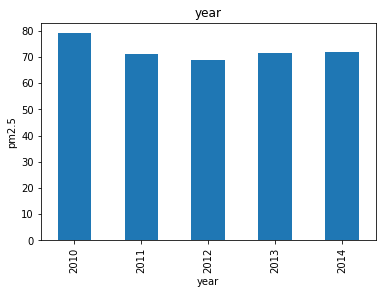

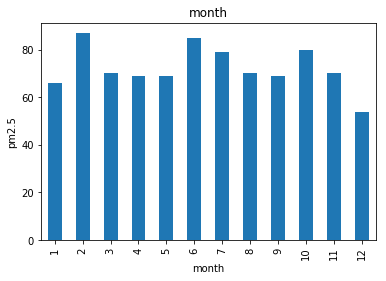

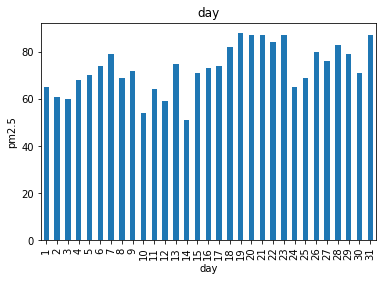

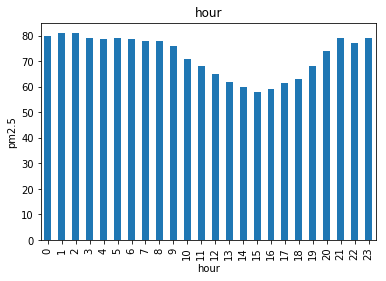

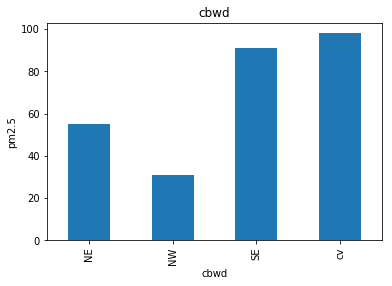

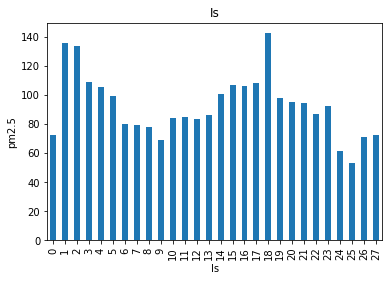

In [13]:
#data analysis
bar_p = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O' or len(dataset[feature].unique())<35]
for feature in bar_p:
    data=dataset.copy()
    data.groupby(feature)['pm2.5'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('pm2.5')
    plt.title(feature)
    plt.show()

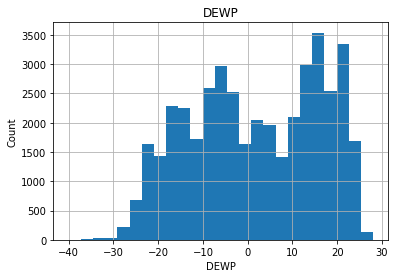

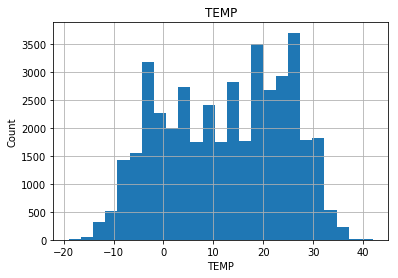

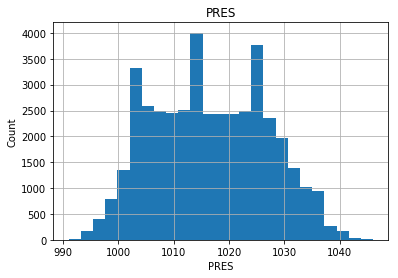

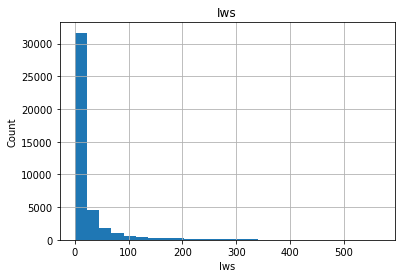

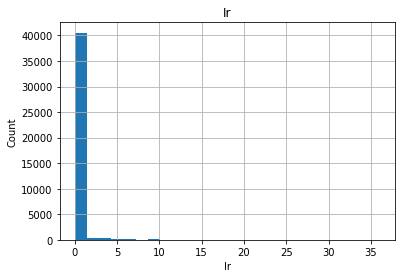

In [14]:
#data analysis
his_t = [feature for feature in dataset.columns if feature not in bar_p + ['pm2.5']]
for feature in his_t:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [15]:
#make dummy feature of categorical feature type
dummy = pd.get_dummies(dataset['cbwd'])
dataset = pd.concat([dummy,dataset],axis = 1)
dataset =dataset.drop(['cbwd'],axis = 1)
dataset.head()

,NE,NW,SE,cv,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,0,0,1,0,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,0,0,1,0,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,0,0,1,0,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,0,0,1,0,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,0,0,1,0,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [16]:
dataset.shape

(41757, 15)

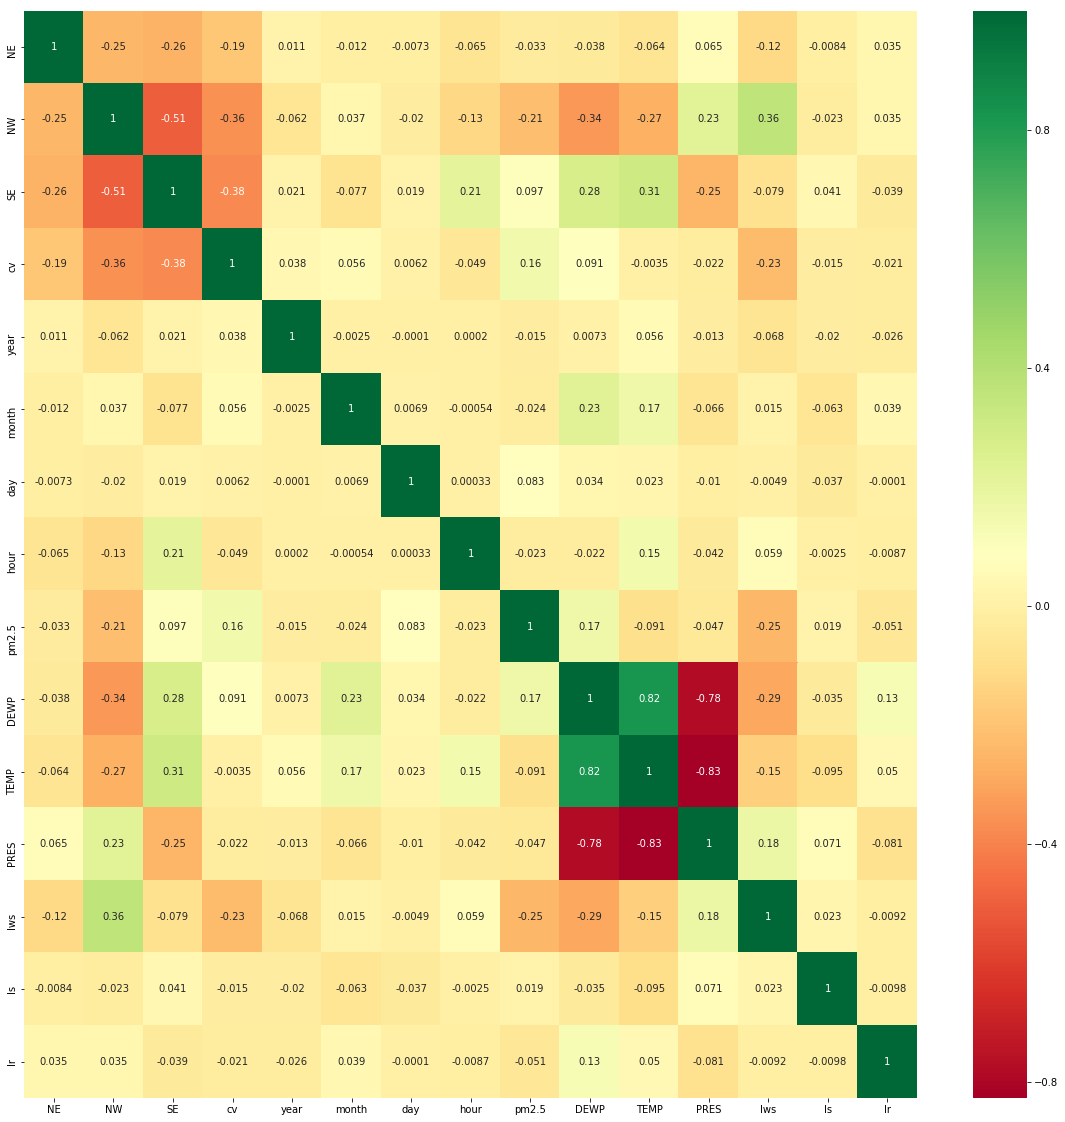

In [17]:
#get correlations of each features in dataset using heatmap
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#separate the dependent and independent variable
X = dataset.drop(['pm2.5'],axis = 1)
y = dataset['pm2.5']

In [19]:
X.head()

,NE,NW,SE,cv,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
24,0,0,1,0,2010,1,2,0,-16,-4.0,1020.0,1.79,0,0
25,0,0,1,0,2010,1,2,1,-15,-4.0,1020.0,2.68,0,0
26,0,0,1,0,2010,1,2,2,-11,-5.0,1021.0,3.57,0,0
27,0,0,1,0,2010,1,2,3,-7,-5.0,1022.0,5.36,1,0
28,0,0,1,0,2010,1,2,4,-7,-5.0,1022.0,6.25,2,0


In [20]:
y.head()

24    129.0
25    148.0
26    159.0
27    181.0
28    138.0
Name: pm2.5, dtype: float64

In [21]:
#split training set(70%) and test set(30%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train.shape

(29229, 14)

In [25]:
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
#fit the random forest into training set
regressorr = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressorr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
#making prediction on test set
Y_pred = regressorr.predict(X_test)

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))

MAE: 22.62906768837803


In [30]:
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))

MSE: 1309.2074818167305


In [31]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

RMSE: 36.182972263438096


In [32]:
from sklearn.metrics import r2_score

In [33]:
print('r2_score:',r2_score(Y_test,Y_pred))

r2_score: 0.8421406460759899


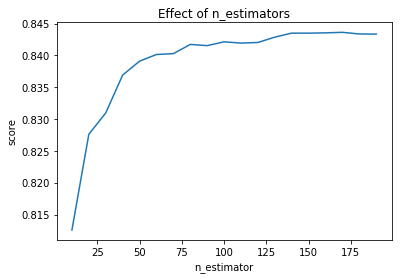

In [34]:
#trying different numbers of n_estimators
estimators = np.arange(10, 200, 10)
scores = []
for i in estimators:
  regressorr.set_params(n_estimators = i)
  regressorr.fit(X_train, Y_train)
  scores.append(regressorr.score(X_test,Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [35]:
#knn
from sklearn.neighbors import KNeighborsRegressor

In [36]:
# Fitting K-NN to the Training set
reg = KNeighborsRegressor(n_neighbors = 4, metric = 'minkowski', p = 2)
reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [37]:
# Predicting the Test set results
Y_pred = reg.predict(X_test)

In [38]:
Y_pred

array([168.75, 269.5 , 113.5 , ...,  18.5 ,  52.75,  30.75])

In [39]:
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))

MAE: 33.16969987228608


In [40]:
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))

MSE: 2843.0130607439337


In [41]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

RMSE: 53.319912422508104


In [42]:
print('r2_score:',r2_score(Y_test,Y_pred))

r2_score: 0.6572000915059049
